## Import lib

In [3]:
import urllib.parse
import re
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import tqdm.notebook as tq
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1. Thu thập dữ liệu (15đ)

### 3.1.1 - Bạn hãy viết code cào dữ liệu từ trang web trên, lưu kết quả vào 1 file tương ứng (kq.txt) và mô tả ngắn gọn về cấu trúc của trang Web trên?

#### 1. Crawl data và lưu vào 1 file kq.txt

In [2]:
website_link = 'http://quotes.toscrape.com/'
get_link_page = lambda number :  website_link + f'page/{number}/'

In [3]:
data = []
for i in range(1, 11):
    response = requests.get(get_link_page(i))
    soup = BeautifulSoup(response.text, 'html.parser')
    data.append(soup)

In [4]:
with open('kq.txt', 'w', encoding = 'utf-8') as file:
    for x in data:
        file.write(str(x) + '\n')    

In [5]:
data

[<!DOCTYPE html>
 
 <html lang="en">
 <head>
 <meta charset="utf-8"/>
 <title>Quotes to Scrape</title>
 <link href="/static/bootstrap.min.css" rel="stylesheet"/>
 <link href="/static/main.css" rel="stylesheet"/>
 </head>
 <body>
 <div class="container">
 <div class="row header-box">
 <div class="col-md-8">
 <h1>
 <a href="/" style="text-decoration: none">Quotes to Scrape</a>
 </h1>
 </div>
 <div class="col-md-4">
 <p>
 <a href="/login">Login</a>
 </p>
 </div>
 </div>
 <div class="row">
 <div class="col-md-8">
 <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
 <span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
 <span>by <small class="author" itemprop="author">Albert Einstein</small>
 <a href="/author/Albert-Einstein">(about)</a>
 </span>
 <div class="tags">
             Tags:
             <meta class="keywords" content="change,deep-thoughts,thinking,world"

#### 2. mô tả ngắn gọn về cấu trúc của trang Web

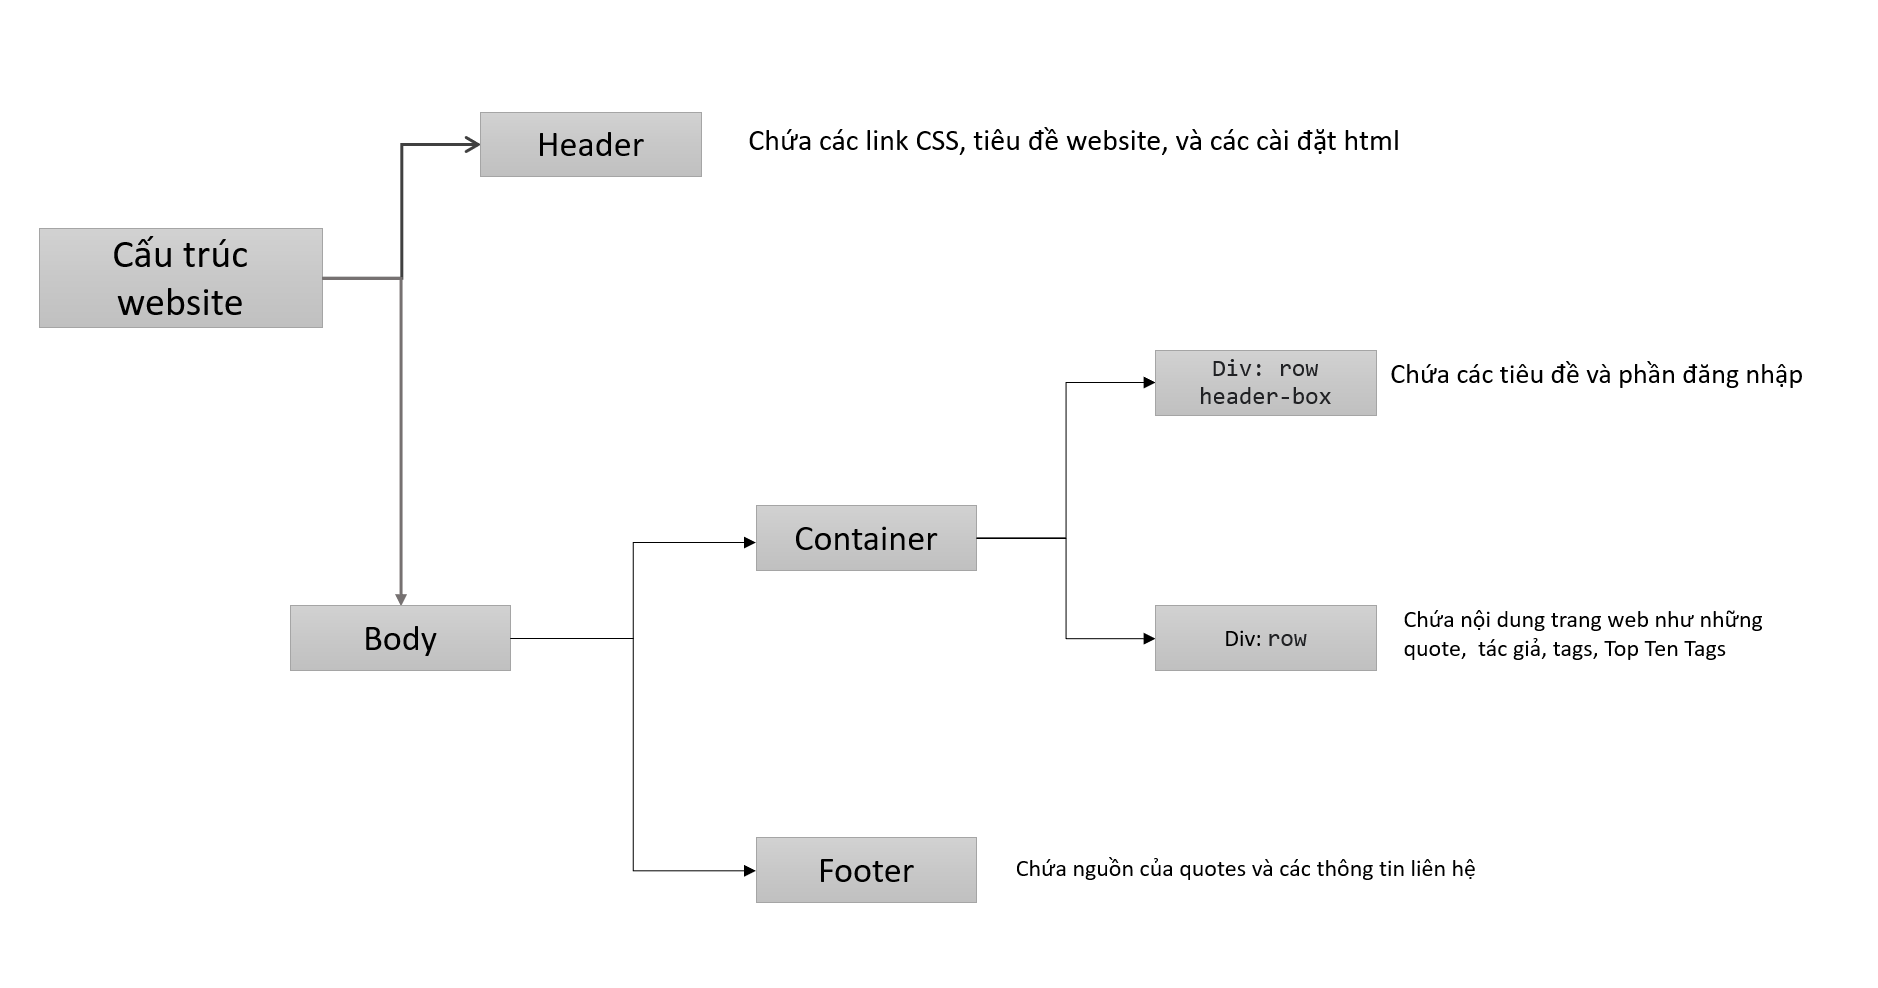

### 3.1.2 - Với dữ liệu bạn vừa cào về, bạn hãy thực hiện các yêu cầu sau:


#### a. Hãy đọc tất cả các thẻ html (div) với lớp là "quote" và lưu nó trong biến 'result’, hiển thị giá trị biến 'result’ ra màn hình?

In [26]:
result = []
for dt in data:
    result += (dt.select('div.quote'))
print(result)

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

#### b. Hãy tìm trong biến 'result’ vừa rồi các dữ liệu có chứa nhãn "small" với class là "author" và in kết quả ra màn hình?


In [124]:
small = []
for re in result:
    small += re.select('small.author')
print(small)

[<small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">J.K. Rowling</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">Jane Austen</small>, <small class="author" itemprop="author">Marilyn Monroe</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">André Gide</small>, <small class="author" itemprop="author">Thomas A. Edison</small>, <small class="author" itemprop="author">Eleanor Roosevelt</small>, <small class="author" itemprop="author">Steve Martin</small>, <small class="author" itemprop="author">Marilyn Monroe</small>, <small class="author" itemprop="author">J.K. Rowling</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">Bob Marley</small>, <small class="author" itemprop="author">Dr. Seuss</small>, <small class="author" itemprop="author">Douglas Adam

#### c. Hãy viết hàm tacgiaLink() để lấy nội dung của mỗi tác giả. Với mỗi tác giả in ra màn hình các nội dung:
- Tên tác giả
- Đường link của tác giả
- Ngày tháng năm sinh
- Và câu nói nổi tiếng của tác giả

In [63]:
all_link_author = set()
i = 0
for re in result:
    link_author = str(re.select('span > a')[0])
    all_link_author.add('http://quotes.toscrape.com' + link_author.split('"')[1])
    
all_link_author = list(all_link_author)
all_link_author

['http://quotes.toscrape.com/author/Mark-Twain',
 'http://quotes.toscrape.com/author/Bob-Marley',
 'http://quotes.toscrape.com/author/Martin-Luther-King-Jr',
 'http://quotes.toscrape.com/author/George-Eliot',
 'http://quotes.toscrape.com/author/Eleanor-Roosevelt',
 'http://quotes.toscrape.com/author/Allen-Saunders',
 'http://quotes.toscrape.com/author/Haruki-Murakami',
 'http://quotes.toscrape.com/author/Mother-Teresa',
 'http://quotes.toscrape.com/author/George-Carlin',
 'http://quotes.toscrape.com/author/Khaled-Hosseini',
 'http://quotes.toscrape.com/author/Friedrich-Nietzsche',
 'http://quotes.toscrape.com/author/Alexandre-Dumas-fils',
 'http://quotes.toscrape.com/author/Thomas-A-Edison',
 'http://quotes.toscrape.com/author/Marilyn-Monroe',
 'http://quotes.toscrape.com/author/J-K-Rowling',
 'http://quotes.toscrape.com/author/Elie-Wiesel',
 'http://quotes.toscrape.com/author/C-S-Lewis',
 'http://quotes.toscrape.com/author/James-Baldwin',
 'http://quotes.toscrape.com/author/Charles-M-

In [241]:
def get_quotes_author(link_author, author_name):
    author_name = ' '.join(author_name.split('-'))
    idx_quotes = []
    author_quotes = []
    for idx, author in enumerate(small):
        if author_name == author.text:
            idx_quotes.append(idx)
    for idx in idx_quotes:
        author_quotes.append(result[idx].find('span', class_='text').text)
    return author_quotes

In [242]:
def tacgiaLink(link_author):
    soup = BeautifulSoup(requests.get(link_author).text, 'html.parser')
    
    #get name
    author_name = soup.find('h3', class_='author-title').text.strip().split('\n')[0]
    
    #get birthday
    birth = soup.select_one('span.author-born-date').text
    birth = pd.to_datetime(birth)
    day = birth.strftime("%d")
    month = birth.strftime("%m")
    year = birth.strftime("%Y")
    author_birth = day + '/' + month + '/' + year
    
    # get quotes
    author_quotes = []
    author_quotes = get_quotes_author(link_author, author_name)
    
    return {
        'Author_name': author_name,
        'Author_link': link_author,
        'Birthday': author_birth,
        'Number_quotes': len(author_quotes),
        'Quotes': author_quotes,
    }

In [243]:
#Test
print(tacgiaLink(all_link_author[0]))

{'Author_name': 'Mark Twain', 'Author_link': 'http://quotes.toscrape.com/author/Mark-Twain', 'Birthday': '30/11/1835', 'Number_quotes': 6, 'Quotes': ['“Good friends, good books, and a sleepy conscience: this is the ideal life.”', '“I have never let my schooling interfere with my education.”', "“′Classic′ - a book which people praise and don't read.”", '“The fear of death follows from the fear of life. A man who lives fully is prepared to die at any time.”', '“A lie can travel half way around the world while the truth is putting on its shoes.”', '“Never tell the truth to people who are not worthy of it.”']}


In [244]:
list_Author_name = []
list_Author_link = []
list_Birthday = []
list_Number_quotes = []
list_Quotes = []
for idx, author_link in tq.tqdm(enumerate(all_link_author)):
    author_content = tacgiaLink(author_link)
    print('------- author:', idx, '-------\n')
    print('Tên tác giả: ', author_content['Author_name'])
    print('Link: ', author_content['Author_link'])
    print('Năm sinh: ', author_content['Birthday'])
    print('Số lượng quotes: ', author_content['Number_quotes'])
    print()
    print('Quotes: ', '\n'.join(author_content['Quotes']))
    print()
    
    list_Author_name.append(author_content['Author_name'])
    list_Author_link.append(author_content['Author_link'])
    list_Birthday.append(author_content['Birthday'])
    list_Number_quotes.append(author_content['Number_quotes'])
    list_Quotes.append(author_content['Quotes'])

0it [00:00, ?it/s]

------- author: 0 -------

Tên tác giả:  Mark Twain
Link:  http://quotes.toscrape.com/author/Mark-Twain
Năm sinh:  30/11/1835
Số lượng quotes:  6

Quotes:  “Good friends, good books, and a sleepy conscience: this is the ideal life.”
“I have never let my schooling interfere with my education.”
“′Classic′ - a book which people praise and don't read.”
“The fear of death follows from the fear of life. A man who lives fully is prepared to die at any time.”
“A lie can travel half way around the world while the truth is putting on its shoes.”
“Never tell the truth to people who are not worthy of it.”

------- author: 1 -------

Tên tác giả:  Bob Marley
Link:  http://quotes.toscrape.com/author/Bob-Marley
Năm sinh:  06/02/1945
Số lượng quotes:  3

Quotes:  “You may not be her first, her last, or her only. She loved before she may love again. But if she loves you now, what else matters? She's not perfect—you aren't either, and the two of you may never be perfect together but if she can make you 

------- author: 17 -------

Tên tác giả:  James Baldwin
Link:  http://quotes.toscrape.com/author/James-Baldwin
Năm sinh:  02/08/1924
Số lượng quotes:  1

Quotes:  “Love does not begin and end the way we seem to think it does. Love is a battle, love is a war; love is a growing up.”

------- author: 18 -------

Tên tác giả:  Charles M. Schulz
Link:  http://quotes.toscrape.com/author/Charles-M-Schulz
Năm sinh:  26/11/1922
Số lượng quotes:  1

Quotes:  “All you need is love. But a little chocolate now and then doesn't hurt.”

------- author: 19 -------

Tên tác giả:  George Bernard Shaw
Link:  http://quotes.toscrape.com/author/George-Bernard-Shaw
Năm sinh:  26/07/1856
Số lượng quotes:  1

Quotes:  “Life isn't about finding yourself. Life is about creating yourself.”

------- author: 20 -------

Tên tác giả:  John Lennon
Link:  http://quotes.toscrape.com/author/John-Lennon
Năm sinh:  09/10/1940
Số lượng quotes:  1

Quotes:  “You may say I'm a dreamer, but I'm not the only one. I hope someda

------- author: 42 -------

Tên tác giả:  Jimi Hendrix
Link:  http://quotes.toscrape.com/author/Jimi-Hendrix
Năm sinh:  27/11/1942
Số lượng quotes:  1

Quotes:  “I'm the one that's got to die when it's time for me to die, so let me live my life the way I want to.”

------- author: 43 -------

Tên tác giả:  Harper Lee
Link:  http://quotes.toscrape.com/author/Harper-Lee
Năm sinh:  28/04/1926
Số lượng quotes:  1

Quotes:  “You never really understand a person until you consider things from his point of view... Until you climb inside of his skin and walk around in it.”

------- author: 44 -------

Tên tác giả:  W.C. Fields
Link:  http://quotes.toscrape.com/author/W-C-Fields
Năm sinh:  29/01/1880
Số lượng quotes:  1

Quotes:  “I am free of all prejudice. I hate everyone equally. ”

------- author: 45 -------

Tên tác giả:  Ralph Waldo Emerson
Link:  http://quotes.toscrape.com/author/Ralph-Waldo-Emerson
Năm sinh:  25/05/1803
Số lượng quotes:  2

Quotes:  “For every minute you are angry you l

#### d. Hãy lưu kết quả ở câu c vào file Quote.csv tương ứng, với mỗi tác giả là 1 dòng dữ liệu. Bạn được yêu cầu thu thập ít nhất 40 câu nói nổi tiếng từ trang web trên một cách tự động theo code của các ý trên?

In [245]:
df = pd.DataFrame(columns = ['Author_name', 'Author_link', 'Birthday', 'Number_quotes', 'Quotes'])
df

,Author_name,Author_link,Birthday,Number_quotes,Quotes


In [246]:
df['Author_name'] = list_Author_name
df['Author_link'] = list_Author_link
df['Birthday'] = list_Birthday
df['Number_quotes'] = list_Number_quotes
df['Quotes'] = list_Quotes
df

,Author_name,Author_link,Birthday,Number_quotes,Quotes
0,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,30/11/1835,6,"[“Good friends, good books, and a sleepy consc..."
1,Bob Marley,http://quotes.toscrape.com/author/Bob-Marley,06/02/1945,3,"[“You may not be her first, her last, or her o..."
2,Martin Luther King Jr.,http://quotes.toscrape.com/author/Martin-Luthe...,15/01/1929,1,[“Only in the darkness can you see the stars.”]
3,George Eliot,http://quotes.toscrape.com/author/George-Eliot,22/11/1819,1,[“It is never too late to be what you might ha...
4,Eleanor Roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...,11/10/1884,2,[“A woman is like a tea bag; you never know ho...
5,Allen Saunders,http://quotes.toscrape.com/author/Allen-Saunders,24/04/1899,1,[“Life is what happens to us while we are maki...
6,Haruki Murakami,http://quotes.toscrape.com/author/Haruki-Murakami,12/01/1949,1,[“If you only read the books that everyone els...
7,Mother Teresa,http://quotes.toscrape.com/author/Mother-Teresa,26/08/1910,2,"[“If you judge people, you have no time to lov..."
8,George Carlin,http://quotes.toscrape.com/author/George-Carlin,12/05/1937,1,[“The reason I talk to myself is because I’m t...
9,Khaled Hosseini,http://quotes.toscrape.com/author/Khaled-Hosseini,04/03/1965,1,[“But better to get hurt by the truth than com...


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Author_name    50 non-null     object
 1   Author_link    50 non-null     object
 2   Birthday       50 non-null     object
 3   Number_quotes  50 non-null     int64 
 4   Quotes         50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [249]:
df.to_csv('Quote.csv', index = False)

## 3.2. Khai phá dữ liệu

### 3.2.1. Xử lý dữ liệu- Data Imputation

#### Bạn hãy thêm vào Trường STT và điền tự động dữ liệu của trường này

In [4]:
df = pd.read_csv('Quote.csv')
df.head(11)

,Author_name,Author_link,Birthday,Number_quotes,Quotes
0,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,30/11/1835,6,"['“Good friends, good books, and a sleepy cons..."
1,Bob Marley,http://quotes.toscrape.com/author/Bob-Marley,06/02/1945,3,"[""“You may not be her first, her last, or her ..."
2,Martin Luther King Jr.,http://quotes.toscrape.com/author/Martin-Luthe...,15/01/1929,1,['“Only in the darkness can you see the stars.”']
3,George Eliot,http://quotes.toscrape.com/author/George-Eliot,22/11/1819,1,['“It is never too late to be what you might h...
4,Eleanor Roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...,11/10/1884,2,"[""“A woman is like a tea bag; you never know h..."
5,Allen Saunders,http://quotes.toscrape.com/author/Allen-Saunders,24/04/1899,1,['“Life is what happens to us while we are mak...
6,Haruki Murakami,http://quotes.toscrape.com/author/Haruki-Murakami,12/01/1949,1,['“If you only read the books that everyone el...
7,Mother Teresa,http://quotes.toscrape.com/author/Mother-Teresa,26/08/1910,2,"['“If you judge people, you have no time to lo..."
8,George Carlin,http://quotes.toscrape.com/author/George-Carlin,12/05/1937,1,['“The reason I talk to myself is because I’m ...
9,Khaled Hosseini,http://quotes.toscrape.com/author/Khaled-Hosseini,04/03/1965,1,['“But better to get hurt by the truth than co...


In [5]:
df['STT'] = df.reset_index().index + 1
df.head()

,Author_name,Author_link,Birthday,Number_quotes,Quotes,STT
0,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,30/11/1835,6,"['“Good friends, good books, and a sleepy cons...",1
1,Bob Marley,http://quotes.toscrape.com/author/Bob-Marley,06/02/1945,3,"[""“You may not be her first, her last, or her ...",2
2,Martin Luther King Jr.,http://quotes.toscrape.com/author/Martin-Luthe...,15/01/1929,1,['“Only in the darkness can you see the stars.”'],3
3,George Eliot,http://quotes.toscrape.com/author/George-Eliot,22/11/1819,1,['“It is never too late to be what you might h...,4
4,Eleanor Roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...,11/10/1884,2,"[""“A woman is like a tea bag; you never know h...",5


#### Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền

In [6]:
print('Dữ liệu bị thiếu ở trường ngày sinh:', df['Birthday'].isna().sum())

Dữ liệu bị thiếu ở trường ngày sinh: 0


Trường dữ liệu ngày sinh của nhóm em crawl về không bị thiếu dữ liệu, nhưng nếu mà có bị thiếu dữ liệu em sẽ đề xuất 2 phương pháp sau đây:
- Phương pháp 1: Search google mà lấy ngày tháng năm sinh từ wikipedia (vì tất cả các tác giả trong dữ liệu đề là tác giả nổi tiếng, em có kiểm tra thì tất cả tác giả điều có tên trên wikipedia và điều có ngày sinh, ngày mất, nên từ đó em có thể crawl được ngày sinh của tất cả các tất giả, đây là phương pháp em cũng dụng để crawl ngày mất tác giả và từ đó tính tuổi tác giả
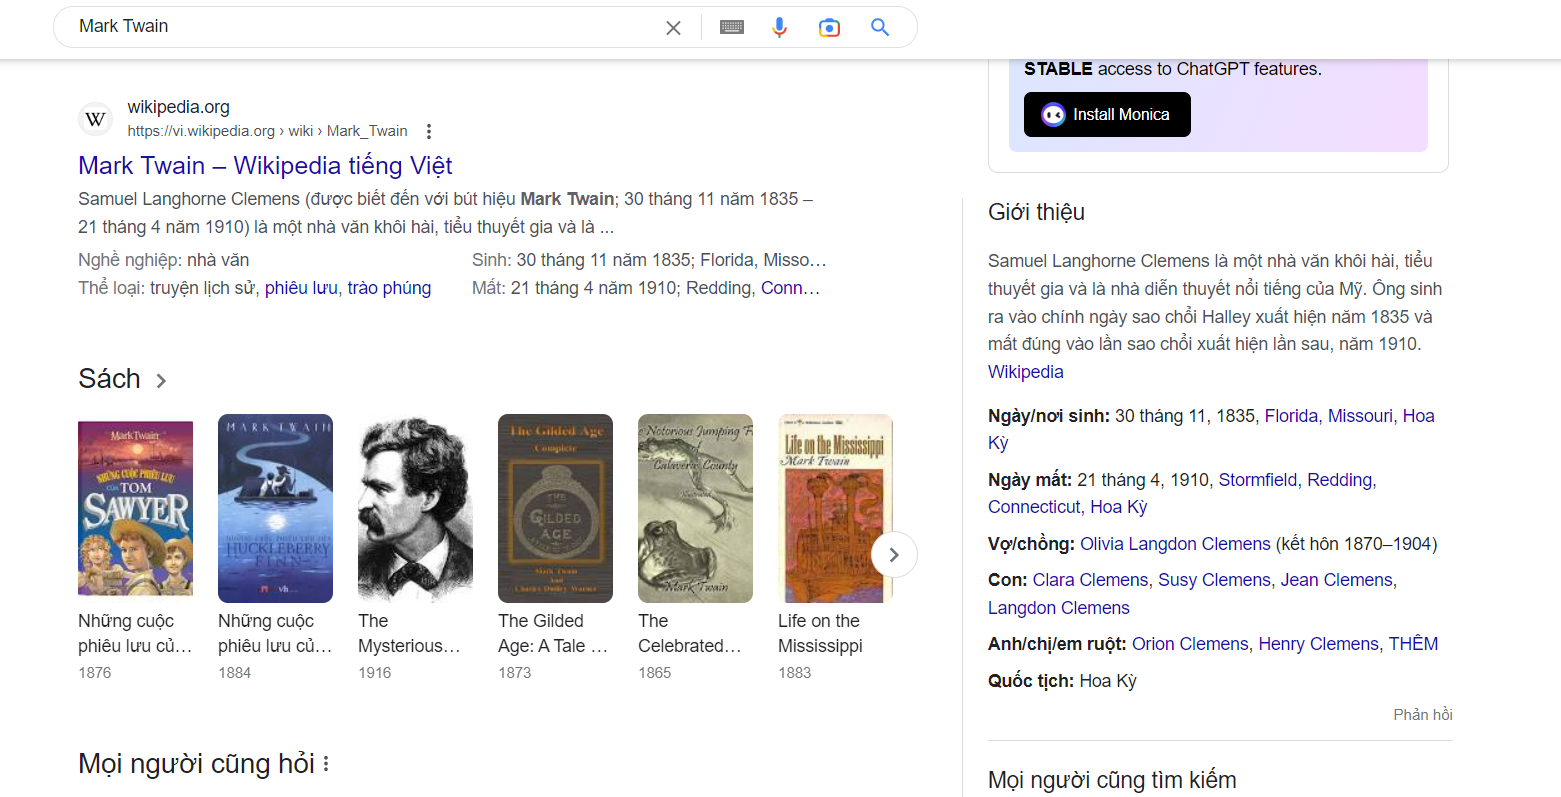 
- Phương pháp 2: Thay vì sử dụng google search thì em sẽ dùng API của ChatGPT bởi vì là tác giả nổi tiếng nên mọi thông tin của tác giả chúng ta đều có thể trích xuất từ ChatGPT


#### Bạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả

Như đã nói ở trên em sẽ dùng phương pháp 1 trong 2 phương pháp em đã nêu ra đó là sử dụng google search để crawl thêm được ngày mất của tác giả và từ đó tính được tuổi tác giả

In [8]:
Deathday = []
driver = webdriver.Chrome()
googlesearch = 'https://www.google.com/search?q='
driver.get('https://google.com')
for idx, name in enumerate(df['Author_name']):
    driver.get(googlesearch + name)
    sleep(2)
    try:
        deathday = driver.find_element(By.CSS_SELECTOR, 'div:nth-child(3) > div > div > div > span:nth-child(2) > span')
        author_death = deathday.text.split(', ')[1]
        if int(author_death) - int(df['Birthday'][idx][-4:]) > 200 or int(author_death) - int(df['Birthday'][idx][-4:]) <= 0:
            assert(False)
        print(f"{name}: ({df['Birthday'][idx][-4:]}:{author_death})")
        Deathday.append(author_death)
    except:
        Deathday.append(None)
        print(f"{name}: ({df['Birthday'][idx][-4:]}: ALive)")
    sleep(2)

Mark Twain: (1835:1910)
Bob Marley: (1945:1981)
Martin Luther King Jr.: (1929:1968)
George Eliot: (1819:1880)
Eleanor Roosevelt: (1884:1962)
Allen Saunders: (1899:1986)
Haruki Murakami: (1949: ALive)
Mother Teresa: (1910:1997)
George Carlin: (1937:2008)
Khaled Hosseini: (1965: ALive)
Friedrich Nietzsche: (1844:1900)
Alexandre Dumas-fils: (1824:1895)
Thomas A. Edison: (1847:1931)
Marilyn Monroe: (1926:1962)
J.K. Rowling: (1965: ALive)
Elie Wiesel: (1928:2016)
C.S. Lewis: (1898:1963)
James Baldwin: (1924:1987)
Charles M. Schulz: (1922:2000)
George Bernard Shaw: (1856:1950)
John Lennon: (1940:1980)
Stephenie Meyer: (1973: ALive)
Jim Henson: (1936:1990)
Helen Keller: (1880:1968)
Suzanne Collins: (1962: ALive)
E.E. Cummings: (1894:1962)
André Gide: (1869:1951)
Alfred Tennyson: (1809:1892)
William Nicholson: (1948: ALive)
Pablo Neruda: (1904:1973)
Madeleine L'Engle: (1918:2007)
Ayn Rand: (1905:1982)
George R.R. Martin: (1948: ALive)
Garrison Keillor: (1942: ALive)
J.M. Barrie: (1860:1937)
Te

In [9]:
df['Deathday'] = Deathday
df

,Author_name,Author_link,Birthday,Number_quotes,Quotes,STT,Deathday
0,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,30/11/1835,6,"['“Good friends, good books, and a sleepy cons...",1,1910
1,Bob Marley,http://quotes.toscrape.com/author/Bob-Marley,06/02/1945,3,"[""“You may not be her first, her last, or her ...",2,1981
2,Martin Luther King Jr.,http://quotes.toscrape.com/author/Martin-Luthe...,15/01/1929,1,['“Only in the darkness can you see the stars.”'],3,1968
3,George Eliot,http://quotes.toscrape.com/author/George-Eliot,22/11/1819,1,['“It is never too late to be what you might h...,4,1880
4,Eleanor Roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...,11/10/1884,2,"[""“A woman is like a tea bag; you never know h...",5,1962
5,Allen Saunders,http://quotes.toscrape.com/author/Allen-Saunders,24/04/1899,1,['“Life is what happens to us while we are mak...,6,1986
6,Haruki Murakami,http://quotes.toscrape.com/author/Haruki-Murakami,12/01/1949,1,['“If you only read the books that everyone el...,7,None
7,Mother Teresa,http://quotes.toscrape.com/author/Mother-Teresa,26/08/1910,2,"['“If you judge people, you have no time to lo...",8,1997
8,George Carlin,http://quotes.toscrape.com/author/George-Carlin,12/05/1937,1,['“The reason I talk to myself is because I’m ...,9,2008
9,Khaled Hosseini,http://quotes.toscrape.com/author/Khaled-Hosseini,04/03/1965,1,['“But better to get hurt by the truth than co...,10,None


In [10]:
df['Birthyear'] = df['Birthday'].apply(lambda x: int(x[-4:]))
df

,Author_name,Author_link,Birthday,Number_quotes,Quotes,STT,Deathday,Birthyear
0,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,30/11/1835,6,"['“Good friends, good books, and a sleepy cons...",1,1910,1835
1,Bob Marley,http://quotes.toscrape.com/author/Bob-Marley,06/02/1945,3,"[""“You may not be her first, her last, or her ...",2,1981,1945
2,Martin Luther King Jr.,http://quotes.toscrape.com/author/Martin-Luthe...,15/01/1929,1,['“Only in the darkness can you see the stars.”'],3,1968,1929
3,George Eliot,http://quotes.toscrape.com/author/George-Eliot,22/11/1819,1,['“It is never too late to be what you might h...,4,1880,1819
4,Eleanor Roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...,11/10/1884,2,"[""“A woman is like a tea bag; you never know h...",5,1962,1884
5,Allen Saunders,http://quotes.toscrape.com/author/Allen-Saunders,24/04/1899,1,['“Life is what happens to us while we are mak...,6,1986,1899
6,Haruki Murakami,http://quotes.toscrape.com/author/Haruki-Murakami,12/01/1949,1,['“If you only read the books that everyone el...,7,None,1949
7,Mother Teresa,http://quotes.toscrape.com/author/Mother-Teresa,26/08/1910,2,"['“If you judge people, you have no time to lo...",8,1997,1910
8,George Carlin,http://quotes.toscrape.com/author/George-Carlin,12/05/1937,1,['“The reason I talk to myself is because I’m ...,9,2008,1937
9,Khaled Hosseini,http://quotes.toscrape.com/author/Khaled-Hosseini,04/03/1965,1,['“But better to get hurt by the truth than co...,10,None,1965


In [11]:
current_year = datetime.now().year
list_age = []
for idx in range(len(df['Deathday'])):
    deathday = df['Deathday'][idx]
    if deathday == None:
        list_age.append(current_year - df['Birthyear'][idx])
    else:
        list_age.append(int(deathday) - df['Birthyear'][idx])
list_age

[75,
 36,
 39,
 61,
 78,
 87,
 74,
 87,
 71,
 58,
 56,
 71,
 84,
 36,
 58,
 88,
 65,
 63,
 78,
 94,
 40,
 50,
 54,
 88,
 61,
 68,
 82,
 83,
 75,
 69,
 89,
 77,
 75,
 81,
 77,
 67,
 62,
 91,
 42,
 87,
 78,
 81,
 28,
 90,
 66,
 79,
 76,
 49,
 87,
 74]

In [12]:
df['Age'] = list_age
df

,Author_name,Author_link,Birthday,Number_quotes,Quotes,STT,Deathday,Birthyear,Age
0,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,30/11/1835,6,"['“Good friends, good books, and a sleepy cons...",1,1910,1835,75
1,Bob Marley,http://quotes.toscrape.com/author/Bob-Marley,06/02/1945,3,"[""“You may not be her first, her last, or her ...",2,1981,1945,36
2,Martin Luther King Jr.,http://quotes.toscrape.com/author/Martin-Luthe...,15/01/1929,1,['“Only in the darkness can you see the stars.”'],3,1968,1929,39
3,George Eliot,http://quotes.toscrape.com/author/George-Eliot,22/11/1819,1,['“It is never too late to be what you might h...,4,1880,1819,61
4,Eleanor Roosevelt,http://quotes.toscrape.com/author/Eleanor-Roos...,11/10/1884,2,"[""“A woman is like a tea bag; you never know h...",5,1962,1884,78
5,Allen Saunders,http://quotes.toscrape.com/author/Allen-Saunders,24/04/1899,1,['“Life is what happens to us while we are mak...,6,1986,1899,87
6,Haruki Murakami,http://quotes.toscrape.com/author/Haruki-Murakami,12/01/1949,1,['“If you only read the books that everyone el...,7,None,1949,74
7,Mother Teresa,http://quotes.toscrape.com/author/Mother-Teresa,26/08/1910,2,"['“If you judge people, you have no time to lo...",8,1997,1910,87
8,George Carlin,http://quotes.toscrape.com/author/George-Carlin,12/05/1937,1,['“The reason I talk to myself is because I’m ...,9,2008,1937,71
9,Khaled Hosseini,http://quotes.toscrape.com/author/Khaled-Hosseini,04/03/1965,1,['“But better to get hurt by the truth than co...,10,None,1965,58


In [ ]:
df.to_csv('Quote_fulldata.csv', index = False)

### 3.2.2. Khám phá dữ liệu- Data Exploration

In [13]:
df = pd.read_csv('Quote_fulldata.csv')
df.sample(3)

,Author_name,Author_link,Birthday,Number_quotes,Quotes,STT,Deathday,Birthyear,Age
20,John Lennon,http://quotes.toscrape.com/author/John-Lennon,09/10/1940,1,"[""“You may say I'm a dreamer, but I'm not the ...",21,1980.0,1940,40
49,Charles Bukowski,http://quotes.toscrape.com/author/Charles-Buko...,16/08/1920,2,"[""“That's the problem with drinking, I thought...",50,1994.0,1920,74
9,Khaled Hosseini,http://quotes.toscrape.com/author/Khaled-Hosseini,04/03/1965,1,['“But better to get hurt by the truth than co...,10,NaN,1965,58


#### Thống kê về năm sinh, độ tuổi tác giả, năm mất và số lượng quotes của mỗi tác giả

In [14]:
print(df.describe())

       Number_quotes       STT     Deathday    Birthyear        Age
count       50.00000  50.00000    40.000000    50.000000  50.000000
mean         2.00000  25.50000  1962.125000  1903.540000  70.760000
std          2.13809  14.57738    44.533011    46.960344  15.524254
min          1.00000   1.00000  1817.000000  1775.000000  36.000000
25%          1.00000  13.25000  1949.000000  1880.000000  61.250000
50%          1.00000  25.50000  1970.500000  1914.000000  75.000000
75%          2.00000  37.75000  1991.750000  1941.500000  81.750000
max         10.00000  50.00000  2016.000000  1973.000000  94.000000


In [15]:
# Thống kê trung bình, trung vị và độ lệch chuẩn
def Thongke(col):
    print(f'------{col}------')
    print(f"Trung bình {col}: ", df[col].mean())
    print(f"Trung vị {col}: ", df[col].median())
    print(f"Độ lệch chuẩn {col}: ", df[col].std())
Thongke('Birthyear')
Thongke('Age')
Thongke('Number_quotes')
Thongke('Deathday')

------Birthyear------
Trung bình Birthyear:  1903.54
Trung vị Birthyear:  1914.0
Độ lệch chuẩn Birthyear:  46.960343669430486
------Age------
Trung bình Age:  70.76
Trung vị Age:  75.0
Độ lệch chuẩn Age:  15.524253572381246
------Number_quotes------
Trung bình Number_quotes:  2.0
Trung vị Number_quotes:  1.0
Độ lệch chuẩn Number_quotes:  2.138089935299395
------Deathday------
Trung bình Deathday:  1962.125
Trung vị Deathday:  1970.5
Độ lệch chuẩn Deathday:  44.533011379920204


In [16]:
df_quotes = pd.DataFrame(columns = ['Author_name', 'Birthyear', 'Age', 'Deathday', 'Quotes'])
df_quotes

,Author_name,Birthyear,Age,Deathday,Quotes


In [17]:
# Hàm bóc tách quote
def solve_quotes(quotes):
    ans = []
    for quote in quotes.replace('“', '”').split('”'):
        if len(quote) > 5:
            ans.append(quote)
    return ans

In [18]:
Names_df_quote = []
Births_df_quote = []
Deaths_df_quote = []
Ages_df_quote = []
Quotes_df_quote = []

index = 0
for id_author in range(len(df['Author_name'])):
    list_quotes = solve_quotes(df['Quotes'][id_author])
    for id_quote in range(len(list_quotes)):
        Names_df_quote.append(df['Author_name'][id_author])
        Births_df_quote.append(df['Birthyear'][id_author])
        Deaths_df_quote.append(df['Deathday'][id_author])
        Ages_df_quote.append(df['Age'][id_author])
        
        Quotes_df_quote.append(list_quotes[id_quote])

df_quotes['Author_name'] = Names_df_quote
df_quotes['Birthyear'] = Births_df_quote
df_quotes['Age'] = Ages_df_quote
df_quotes['Deathday'] = Deaths_df_quote
df_quotes['Quotes'] = Quotes_df_quote
df_quotes

,Author_name,Birthyear,Age,Deathday,Quotes
0,Mark Twain,1835,75,1910.0,"Good friends, good books, and a sleepy conscie..."
1,Mark Twain,1835,75,1910.0,I have never let my schooling interfere with m...
2,Mark Twain,1835,75,1910.0,′Classic′ - a book which people praise and don...
3,Mark Twain,1835,75,1910.0,The fear of death follows from the fear of lif...
4,Mark Twain,1835,75,1910.0,A lie can travel half way around the world whi...
...,...,...,...,...,...
95,Albert Einstein,1879,76,1955.0,Anyone who has never made a mistake has never ...
96,Douglas Adams,1952,49,2001.0,"I may not have gone where I intended to go, bu..."
97,Jorge Luis Borges,1899,87,1986.0,I have always imagined that Paradise will be a...
98,Charles Bukowski,1920,74,1994.0,"That's the problem with drinking, I thought, a..."


#### Thống kê và trực quan hóa về năm sinh và độ tuổi của các tác giả

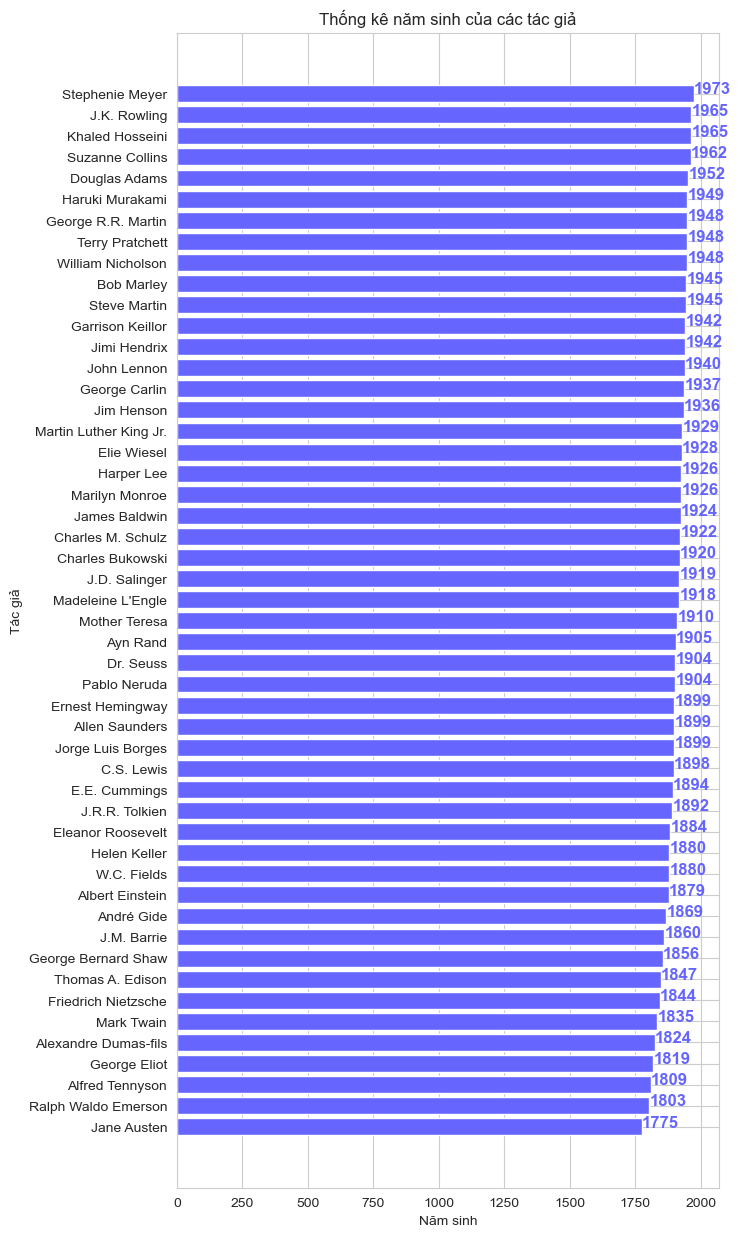

In [19]:
top10 = df.sort_values(by='Birthyear', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(7, 15))
plt.barh(top10['Author_name'][::-1], top10['Birthyear'][::-1], color='#6666FF')
plt.xlabel('Năm sinh')
plt.ylabel('Tác giả')
plt.title('Thống kê năm sinh của các tác giả')
for i, v in enumerate(top10['Birthyear'][::-1]):
    plt.text(v + 1, i, str(v), color='#6666FF', fontweight='bold', fontsize = 12)
plt.show()


In [20]:
def Visual(df_vis, x_col, y_col, num_top, check_sort, color, x_label, y_label, title_vis):
    topnum = df_vis.sort_values(by = x_col, ascending = check_sort).head(num_top)
    sns.set_style("whitegrid")
    plt.figure(figsize=(7, 5))
    plt.barh(topnum[y_col][::-1], topnum[x_col][::-1], color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_vis)
    for i, v in enumerate(topnum[x_col][::-1]):
        plt.text(v + 1, i, str(v), color=color, fontweight='bold', fontsize = 12)
    plt.show()


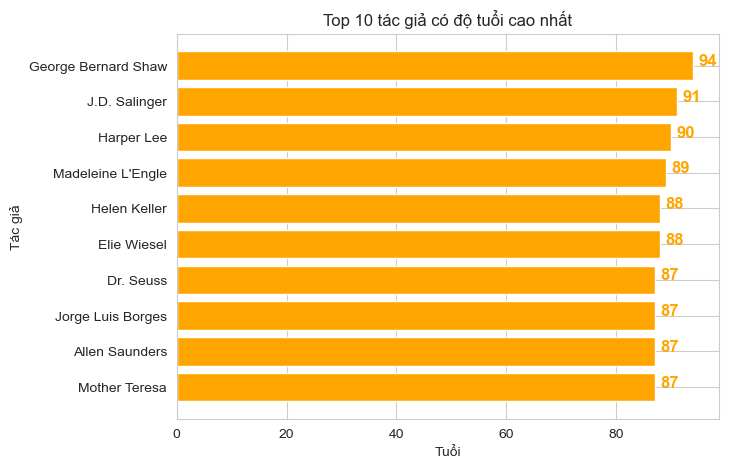

In [21]:
Visual (df, x_col = 'Age', y_col = 'Author_name',
       num_top = 10, check_sort = False,
       color = 'orange',
       x_label = 'Tuổi', y_label = 'Tác giả',
       title_vis = 'Top 10 tác giả có độ tuổi cao nhất')

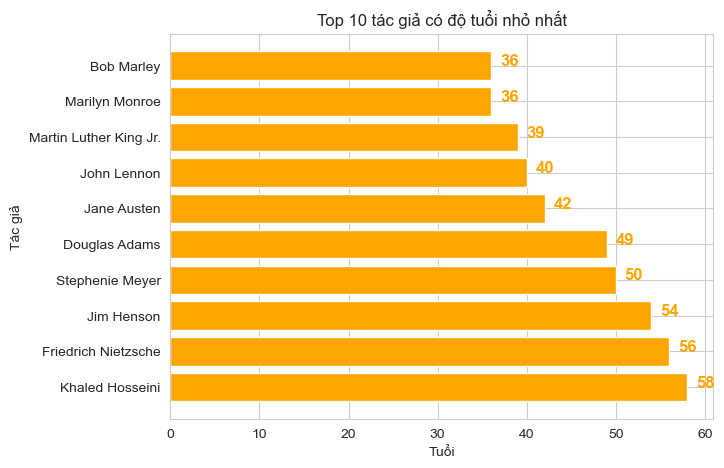

In [22]:
Visual (df, x_col = 'Age', y_col = 'Author_name',
       num_top = 10, check_sort = True,
       color = 'orange',
       x_label = 'Tuổi', y_label = 'Tác giả',
       title_vis = 'Top 10 tác giả có độ tuổi nhỏ nhất')

#### Thống kê và trực quan hóa về tác giả và câu nói nổi tiếng có trong bộ dữ liệu

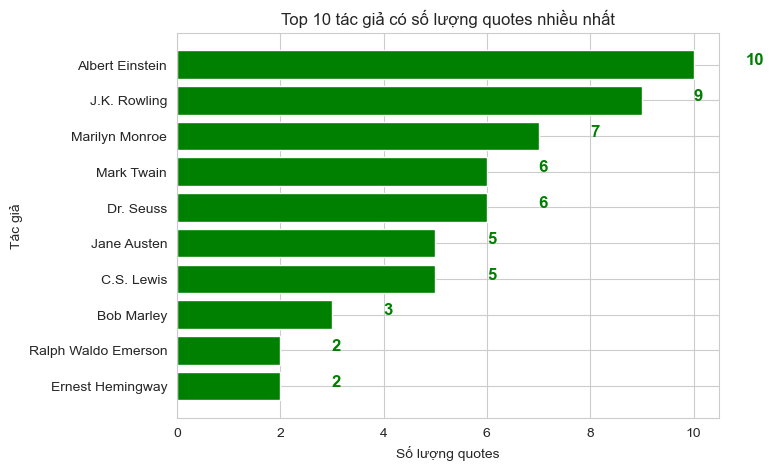

In [23]:
Visual (df, x_col = 'Number_quotes', y_col = 'Author_name',
       num_top = 10, check_sort = False,
       color = 'green',
       x_label = 'Số lượng quotes', y_label = 'Tác giả',
       title_vis = 'Top 10 tác giả có số lượng quotes nhiều nhất')

In [24]:
df_quotes['QuoteLen'] = df_quotes['Quotes'].apply(lambda x: len(x))
df_quotes.head()

,Author_name,Birthyear,Age,Deathday,Quotes,QuoteLen
0,Mark Twain,1835,75,1910.0,"Good friends, good books, and a sleepy conscie...",74
1,Mark Twain,1835,75,1910.0,I have never let my schooling interfere with m...,58
2,Mark Twain,1835,75,1910.0,′Classic′ - a book which people praise and don...,54
3,Mark Twain,1835,75,1910.0,The fear of death follows from the fear of lif...,102
4,Mark Twain,1835,75,1910.0,A lie can travel half way around the world whi...,83


In [25]:
def get_num_word(x):
    count = 0
    check = [',', '.', '-', "'", '"', '?', '!', ':']
    for word in x.split():
        if word not in check:
            count+=1
    return count
    
df_quotes['QuoteWord'] = df_quotes['Quotes'].apply(get_num_word)
df_quotes.head()

,Author_name,Birthyear,Age,Deathday,Quotes,QuoteLen,QuoteWord
0,Mark Twain,1835,75,1910.0,"Good friends, good books, and a sleepy conscie...",74,13
1,Mark Twain,1835,75,1910.0,I have never let my schooling interfere with m...,58,10
2,Mark Twain,1835,75,1910.0,′Classic′ - a book which people praise and don...,54,9
3,Mark Twain,1835,75,1910.0,The fear of death follows from the fear of lif...,102,22
4,Mark Twain,1835,75,1910.0,A lie can travel half way around the world whi...,83,17


#### Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ

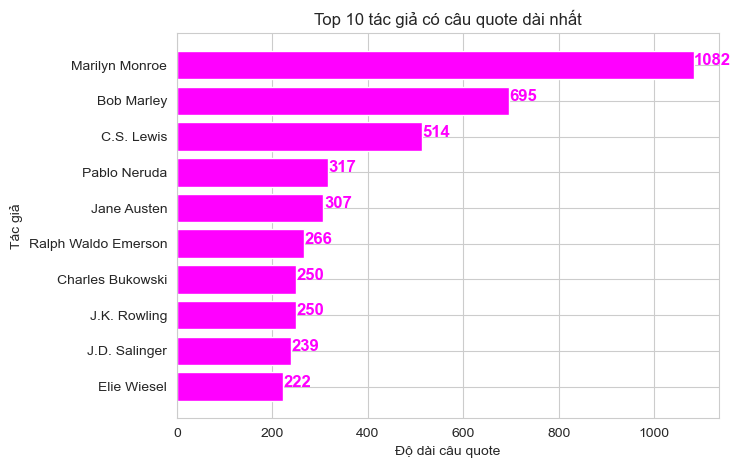

In [26]:
Visual (df_quotes, x_col = 'QuoteLen', y_col = 'Author_name',
       num_top = 10, check_sort = False,
       color = '#FF00FF',
       x_label = 'Độ dài câu quote', y_label = 'Tác giả',
       title_vis = 'Top 10 tác giả có câu quote dài nhất')

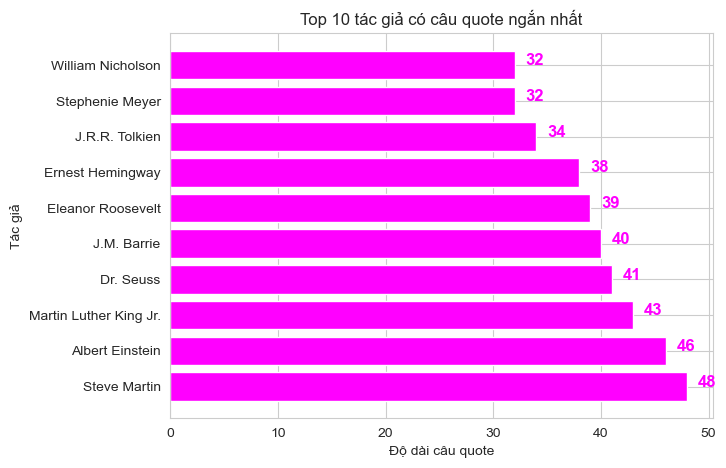

In [27]:
Visual (df_quotes, x_col = 'QuoteLen', y_col = 'Author_name',
       num_top = 10, check_sort = True,
       color = '#FF00FF',
       x_label = 'Độ dài câu quote', y_label = 'Tác giả',
       title_vis = 'Top 10 tác giả có câu quote ngắn nhất')

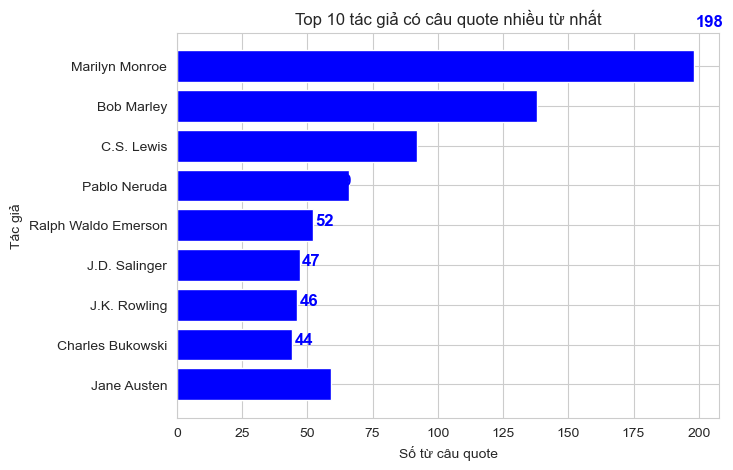

In [28]:
Visual (df_quotes, x_col = 'QuoteWord', y_col = 'Author_name',
       num_top = 10, check_sort = False,
       color = '#0000FF',
       x_label = 'Số từ câu quote', y_label = 'Tác giả',
       title_vis = 'Top 10 tác giả có câu quote nhiều từ nhất')

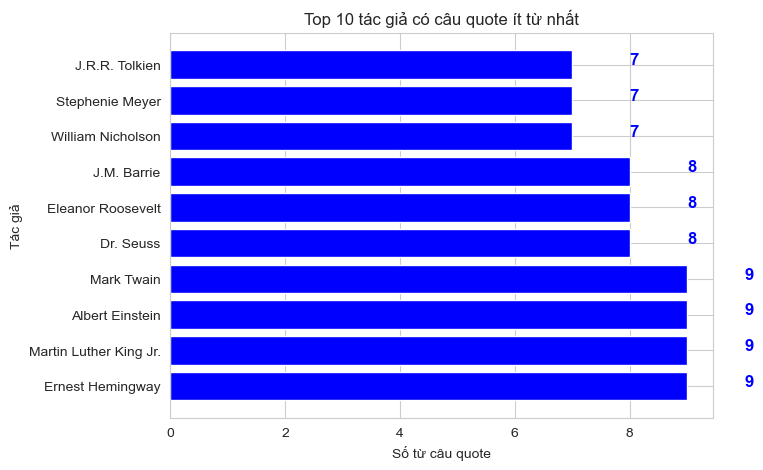

In [29]:
Visual (df_quotes, x_col = 'QuoteWord', y_col = 'Author_name',
       num_top = 10, check_sort = True,
       color = '#0000FF',
       x_label = 'Số từ câu quote', y_label = 'Tác giả',
       title_vis = 'Top 10 tác giả có câu quote ít từ nhất')

#### Thống kê về các từ được sử dụng trong các câu nói

In [30]:
def get_word(x):
    check = [',', '.', '-', "'", '"', '?', '!', ':']
    ans = []
    for word in x.split():
        if word not in check:
            word = word.replace(',', '')
            word = word.replace('.', '')
            word = word.replace('!', '')
            word = word.replace("'", '')
            word = word.replace('"', '')
            word = word.replace('?', '')
            word = word.replace(':', '')
            word = word.lower()
            ans.append(word)
    return ans
full_word = []
for quote in df_quotes['Quotes']:
    full_word += get_word(quote)
full_word

['good',
 'friends',
 'good',
 'books',
 'and',
 'a',
 'sleepy',
 'conscience',
 'this',
 'is',
 'the',
 'ideal',
 'life',
 'i',
 'have',
 'never',
 'let',
 'my',
 'schooling',
 'interfere',
 'with',
 'my',
 'education',
 '′classic′',
 'a',
 'book',
 'which',
 'people',
 'praise',
 'and',
 'dont',
 'read',
 'the',
 'fear',
 'of',
 'death',
 'follows',
 'from',
 'the',
 'fear',
 'of',
 'life',
 'a',
 'man',
 'who',
 'lives',
 'fully',
 'is',
 'prepared',
 'to',
 'die',
 'at',
 'any',
 'time',
 'a',
 'lie',
 'can',
 'travel',
 'half',
 'way',
 'around',
 'the',
 'world',
 'while',
 'the',
 'truth',
 'is',
 'putting',
 'on',
 'its',
 'shoes',
 'never',
 'tell',
 'the',
 'truth',
 'to',
 'people',
 'who',
 'are',
 'not',
 'worthy',
 'of',
 'it',
 'you',
 'may',
 'not',
 'be',
 'her',
 'first',
 'her',
 'last',
 'or',
 'her',
 'only',
 'she',
 'loved',
 'before',
 'she',
 'may',
 'love',
 'again',
 'but',
 'if',
 'she',
 'loves',
 'you',
 'now',
 'what',
 'else',
 'matters',
 'shes',
 'not'

In [31]:
set_word = list(set(full_word))
num_word = []
for word in set_word:
    num_word.append(full_word.count(word))
num_word

[1,
 1,
 1,
 1,
 19,
 1,
 1,
 7,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 5,
 4,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 5,
 1,
 2,
 7,
 2,
 10,
 2,
 2,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 2,
 1,
 23,
 8,
 2,
 2,
 1,
 2,
 3,
 1,
 14,
 18,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 13,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 93,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 5,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 5,
 2,
 1,
 1,
 1,
 1,
 4,
 1,
 10,
 1,
 2,
 1,
 4,
 1,
 1,
 6,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 49,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 6,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 47,
 1,
 3,
 17,
 1,
 2,
 1,
 1,
 11,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 48,
 1,
 7,
 3,
 5,
 1,
 1,
 9,
 1,
 1,
 1,
 17,
 1,
 4,
 1,
 3,
 2,
 1,
 1,
 3,
 1,
 21,
 1,
 2,
 1,
 2,
 3,
 3,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 4,
 2,
 1,
 7,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 11,
 1,
 4,
 9,
 2,
 1,
 7,
 1,
 17,
 1,

In [32]:
df_word = pd.DataFrame(columns = ['Word', 'Count'])
df_word['Word'] = set_word
df_word['Count'] = num_word
df_word

,Word,Count
0,sun,1
1,,1
2,moving,1
3,novel,1
4,can,19
...,...,...
683,tea,2
684,finish,1
685,knocks,1
686,equally,1


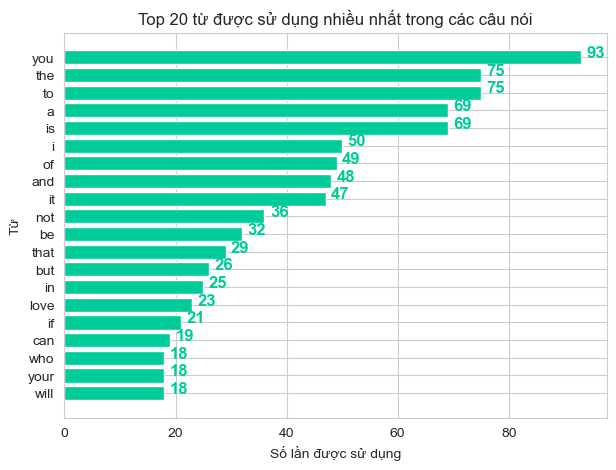

In [33]:
Visual (df_word, x_col = 'Count', y_col = 'Word',
       num_top = 20, check_sort = False,
       color = '#00CC99',
       x_label = 'Số lần được sử dụng', y_label = 'Từ',
       title_vis = 'Top 20 từ được sử dụng nhiều nhất trong các câu nói')

#### Phân tích, trực quan mối quan hệ giữa giữa tác giả và câu nói nổi tiếng

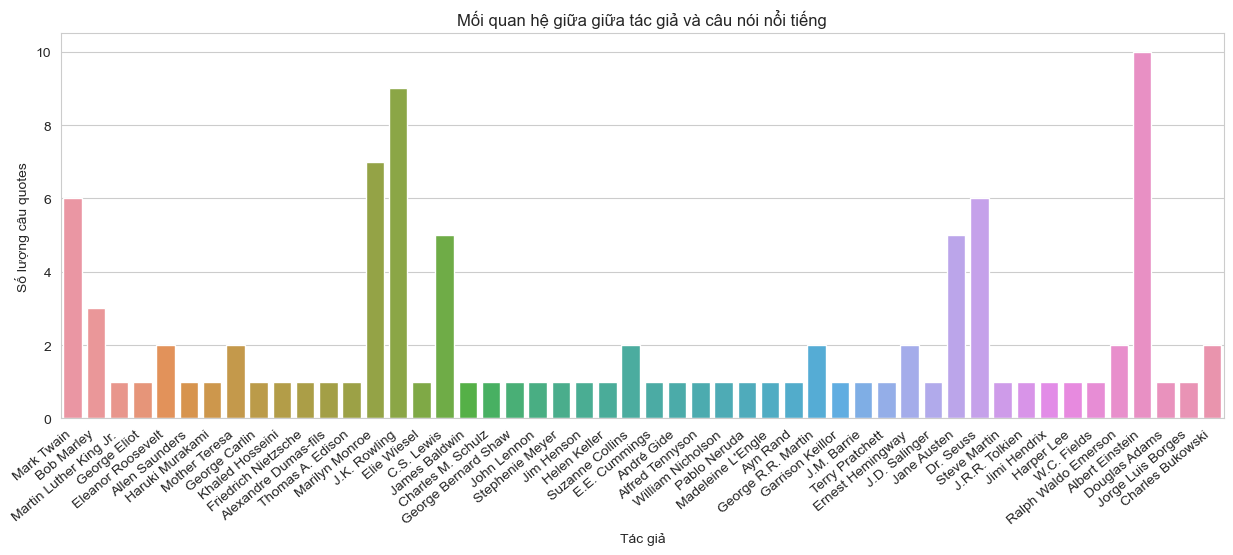

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

ax = sns.countplot(x="Author_name", data=df_quotes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Tác giả")
ax.set_ylabel("Số lượng câu quotes")
ax.set_title("Mối quan hệ giữa giữa tác giả và câu nói nổi tiếng")

plt.show()


### 3.2.3. Trích xuất đặc trưng- Feature Extraction

**Import Lib**

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [36]:
df_quotes.sample(5)

,Author_name,Birthyear,Age,Deathday,Quotes,QuoteLen,QuoteWord
29,J.K. Rowling,1965,58,NaN,"It is our choices, Harry, that show what we tr...",83,16
45,Charles M. Schulz,1922,78,2000.0,All you need is love. But a little chocolate n...,71,14
32,J.K. Rowling,1965,58,NaN,"Of course it is happening inside your head, Ha...",105,21
68,Jane Austen,1775,42,1817.0,"The person, be it gentleman or lady, who has n...",102,19
98,Charles Bukowski,1920,74,1994.0,"That's the problem with drinking, I thought, a...",250,44


**Tiền xử lý dữ liệu**

In [37]:
def clean_text(df, col):
    """
    Thay thế các non-alphanumeric thành khoảng cách, còn lại sẽ chuyển thành chữ thường
    Thay thế khoảng trắng liên tiếp thành một khoảng trắng, và loại bỏ khoảng trắng ở đầu và cuối
    """
    return df[col].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x.lower()))\
                  .apply(lambda x: re.sub('\s+', ' ', x).strip())

In [38]:
df_quotes['Clean_quote'] = clean_text(df_quotes, 'Quotes')
df_quotes.sample(5)

,Author_name,Birthyear,Age,Deathday,Quotes,QuoteLen,QuoteWord,Clean_quote
68,Jane Austen,1775,42,1817.0,"The person, be it gentleman or lady, who has n...",102,19,the person be it gentleman or lady who has not...
51,Suzanne Collins,1962,61,NaN,You don’t forget the face of the person who wa...,63,13,you don t forget the face of the person who wa...
25,Marilyn Monroe,1926,36,1962.0,"If you can make a woman laugh, you can make he...",60,13,if you can make a woman laugh you can make her...
60,George R.R. Martin,1948,75,NaN,A reader lives a thousand lives before he dies...,99,19,a reader lives a thousand lives before he dies...
71,Jane Austen,1775,42,1817.0,I declare after all there is no enjoyment like...,201,42,i declare after all there is no enjoyment like...


In [39]:
import pandas as pd
import nltk

# Tải bộ dữ liệu từ NLTK
nltk.download('punkt')

# Đọc dữ liệu từ file CSV

# Tạo cột mới chứa số lượng từ trong mỗi câu nói
df_quotes['WordCount'] = df_quotes['Clean_quote'].apply(lambda x: len(nltk.word_tokenize(x)))

# Hiển thị kết quả
print(df_quotes[['Clean_quote', 'WordCount']])
df_quotes['Clean_quote'][0]

                                          Clean_quote  WordCount
0   good friends good books and a sleepy conscienc...         13
1   i have never let my schooling interfere with m...         10
2   classic a book which people praise and don t read         10
3   the fear of death follows from the fear of lif...         22
4   a lie can travel half way around the world whi...         17
..                                                ...        ...
95  anyone who has never made a mistake has never ...         12
96  i may not have gone where i intended to go but...         22
97  i have always imagined that paradise will be a...         12
98  that s the problem with drinking i thought as ...         45
99  some people never go crazy what truly horrible...         12

[100 rows x 2 columns]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'good friends good books and a sleepy conscience this is the ideal life'

In [40]:
df_quotes.sample(3)

,Author_name,Birthyear,Age,Deathday,Quotes,QuoteLen,QuoteWord,Clean_quote,WordCount
40,C.S. Lewis,1898,65,1963.0,To love at all is to be vulnerable. Love anyth...,514,92,to love at all is to be vulnerable love anythi...,92
55,Alfred Tennyson,1809,83,1892.0,If I had a flower for every time I thought of ...,91,18,if i had a flower for every time i thought of ...,19
21,Thomas A. Edison,1847,84,1931.0,"I have not failed. I've just found 10,000 ways...",63,12,i have not failed i ve just found 10 000 ways ...,15


In [41]:
features = 'Clean_quote'
target = 'Author_name'

In [42]:
X = df_quotes[features].values
y = df_quotes[target].values

In [43]:
data = df_quotes.copy()
'''
Tiền xử lý dữ liệu (chuyển văn bản thành vector đặc trưng)
Cách 1: Dùng CountVectorizer
Cách 2: Dùng TfidfVectorizer
'''
stop_words = ['a', 'an', 'the', 'and', 'or', 'if', 'of', 'to', 'in', 'on', 'at', 'that', 'this'] 

#C1
vectorizer = CountVectorizer(lowercase=True, stop_words=stop_words, min_df=1)
X = vectorizer.fit_transform(data[features])

#C2
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(data[features])

print(X)
y = data[target]
print(y)

  (0, 238)	2
  (0, 220)	1
  (0, 76)	1
  (0, 503)	1
  (0, 124)	1
  (0, 299)	1
  (0, 279)	1
  (0, 332)	1
  (1, 258)	1
  (1, 401)	1
  (1, 328)	1
  (1, 393)	2
  (1, 481)	1
  (1, 294)	1
  (1, 629)	1
  (1, 170)	1
  (2, 114)	1
  (2, 75)	1
  (2, 619)	1
  (2, 435)	1
  (2, 448)	1
  (2, 155)	1
  (2, 463)	1
  (3, 299)	1
  (3, 332)	1
  :	:
  (98, 511)	3
  (98, 216)	1
  (98, 558)	1
  (98, 408)	1
  (98, 248)	1
  (98, 454)	1
  (98, 163)	1
  (98, 447)	1
  (98, 162)	4
  (98, 48)	1
  (98, 43)	1
  (98, 424)	1
  (98, 99)	1
  (99, 401)	1
  (99, 435)	1
  (99, 339)	1
  (99, 614)	1
  (99, 550)	1
  (99, 508)	1
  (99, 232)	1
  (99, 575)	1
  (99, 392)	1
  (99, 129)	1
  (99, 273)	1
  (99, 324)	1
0            Mark Twain
1            Mark Twain
2            Mark Twain
3            Mark Twain
4            Mark Twain
            ...        
95      Albert Einstein
96        Douglas Adams
97    Jorge Luis Borges
98     Charles Bukowski
99     Charles Bukowski
Name: Author_name, Length: 100, dtype: object


In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [45]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((80, 651), (20, 651), (80,), (20,))

In [46]:
Xtest

<20x651 sparse matrix of type '<class 'numpy.int64'>'
	with 245 stored elements in Compressed Sparse Row format>

In [47]:
class Model:
    def __init__(self, model, name):
        self.model = model
        self.name = name
        self.is_trained = False
        self.predicted = False
        self.ans = ""
        
    def fit(self, Xtrain, Xtest, ytrain, ytest):
        self.model.fit(Xtrain, ytrain)
        ypredict = self.model.predict(Xtest)
        self.acc = accuracy_score(ytest, ypredict)
        self.f1_score = f1_score(ytest, ypredict, average='macro')
        self.is_trained = True
    def Prediction(self, your_predict):
        self.predicted = True
        return self.model.predict(your_predict)
    
    def __repr__(self):
        if self.is_trained:
            return f'{self.name} has Accuracy Score: {round(self.acc, 4)} \n {self.name} has F1 score: {round(self.f1_score, 4)}'
        return f'{self.name} is not trained yet'

In [48]:
models = [
    Model(MultinomialNB(), 'Multinomial Naive Bayes'),
    Model(LinearSVC(), 'Linear Support Vector Machine'),
    Model(RandomForestClassifier(), 'Random Forest Classifier'),
    Model(LogisticRegression(), 'Logistic Regression')
]
models

[Multinomial Naive Bayes is not trained yet,
 Linear Support Vector Machine is not trained yet,
 Random Forest Classifier is not trained yet,
 Logistic Regression is not trained yet]

In [49]:
for model in models:
    model.fit(Xtrain, Xtest, ytrain, ytest)

In [50]:
models

[Multinomial Naive Bayes has Accuracy Score: 0.05 
  Multinomial Naive Bayes has F1 score: 0.025,
 Linear Support Vector Machine has Accuracy Score: 0.05 
  Linear Support Vector Machine has F1 score: 0.0145,
 Random Forest Classifier has Accuracy Score: 0.05 
  Random Forest Classifier has F1 score: 0.0074,
 Logistic Regression has Accuracy Score: 0.05 
  Logistic Regression has F1 score: 0.0222]

In [51]:
def get_preprocessing_input(your_predict):
    X = vectorizer.transform(your_predict)
    return X

In [54]:
your_predict = input()
data_new = get_preprocessing_input([your_predict])
for model in models:
    print(model.Prediction(data_new))

nothing is impossible as long as you believe you can do it you can do it
['Marilyn Monroe']
['Albert Einstein']
['Albert Einstein']
['Albert Einstein']


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Tạo corpus
corpus = df_quotes["Clean_quote"]

# Tạo ma trận TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Tính độ tương đồng giữa các tác giả
similarity_matrix = cosine_similarity(X)
mas = 0
# In kết quả
for i in range(len(df)):
    for j in range(i+1, len(df)):
        print(f"Similarity between {df.iloc[i]['Author_name']} and {df.iloc[j]['Author_name']}: {similarity_matrix[i][j]}")
        mas = max(mas, similarity_matrix[i][j])
print(mas)

Similarity between Mark Twain and Bob Marley: 0.0
Similarity between Mark Twain and Martin Luther King Jr.: 0.03326322997011748
Similarity between Mark Twain and George Eliot: 0.07708353330899989
Similarity between Mark Twain and Eleanor Roosevelt: 0.04442554152876222
Similarity between Mark Twain and Allen Saunders: 0.022300149132512926
Similarity between Mark Twain and Haruki Murakami: 0.032264052008144486
Similarity between Mark Twain and Mother Teresa: 0.13316808201694813
Similarity between Mark Twain and George Carlin: 0.05904676877903381
Similarity between Mark Twain and Khaled Hosseini: 0.04788670567358309
Similarity between Mark Twain and Friedrich Nietzsche: 0.019164247079338007
Similarity between Mark Twain and Alexandre Dumas-fils: 0.02782169178110837
Similarity between Mark Twain and Thomas A. Edison: 0.0
Similarity between Mark Twain and Marilyn Monroe: 0.07480227340350547
Similarity between Mark Twain and J.K. Rowling: 0.10848938861688602
Similarity between Mark Twain and

In [56]:
import numpy as np

# Tạo corpus
corpus = df_quotes["Clean_quote"]

# Tạo ma trận TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Tính độ tương đồng giữa các tác giả
similarity_matrix = cosine_similarity(X)

# Sắp xếp độ tương đồng giảm dần
similarities = similarity_matrix[np.triu_indices(len(df), k=1)]
sorted_indices = np.argsort(similarities)[::-1]

# In kết quả
top = 1
for i in sorted_indices:
    j, k = np.triu_indices(len(df), k=1)
    print(f"Top {top}: {df.iloc[j[i]]['Author_name']} and {df.iloc[k[i]]['Author_name']}: {round(similarities[i], 4)}")
    top += 1

Top 1: Haruki Murakami and E.E. Cummings: 0.3358
Top 2: Alfred Tennyson and Ralph Waldo Emerson: 0.2743
Top 3: Helen Keller and Steve Martin: 0.267
Top 4: George Carlin and Helen Keller: 0.2596
Top 5: Khaled Hosseini and Harper Lee: 0.2591
Top 6: George Carlin and J.K. Rowling: 0.2407
Top 7: Helen Keller and Ernest Hemingway: 0.2373
Top 8: Friedrich Nietzsche and J.M. Barrie: 0.2371
Top 9: Khaled Hosseini and J.K. Rowling: 0.2355
Top 10: Mother Teresa and Thomas A. Edison: 0.2298
Top 11: C.S. Lewis and E.E. Cummings: 0.225
Top 12: Pablo Neruda and Madeleine L'Engle: 0.2176
Top 13: George Carlin and Charles M. Schulz: 0.2164
Top 14: Helen Keller and Douglas Adams: 0.215
Top 15: Haruki Murakami and Alfred Tennyson: 0.2149
Top 16: Helen Keller and Madeleine L'Engle: 0.2104
Top 17: Marilyn Monroe and Jimi Hendrix: 0.2099
Top 18: Steve Martin and W.C. Fields: 0.2073
Top 19: Haruki Murakami and Helen Keller: 0.2053
Top 20: John Lennon and Jim Henson: 0.2051
Top 21: Dr. Seuss and J.R.R. Tolki

In [57]:
authors = df_quotes['Author_name'].unique()
max_similarity = 0
most_similar_authors = []

for i, author1 in enumerate(authors):
    for j, author2 in enumerate(authors):
        if i >= j:
            continue
        similarity = similarity_matrix[i][j]
        if similarity >= max_similarity:
            max_similarity = similarity

for i, author1 in enumerate(authors):
    for j, author2 in enumerate(authors):
        if i >= j:
            continue
        similarity = similarity_matrix[i][j]
        if similarity == max_similarity:
            most_similar_authors.append((author1, author2))

print(f"The most similar authors with similarity score of {max_similarity}")
for i in most_similar_authors:
    print(i)

The most similar authors with similarity score of 0.3358049549057698
('Haruki Murakami', 'E.E. Cummings')
